In [39]:
#IMPORTING NECESSARY PACKAGES
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import geopandas as gpd
import pysal
from pysal.explore import esda
import pysal.lib

In [40]:
#IMPORTING THE FILE
path = r'C:\Users\user\Desktop\DATASETSPSS.csv'
India = pd.read_csv(path)

In [41]:
#CONVERTING TO GEO DATA FRAME
gdf = gpd.GeoDataFrame(India,geometry=gpd.points_from_xy(India['Longitude'],India['Latitude']))

<function matplotlib.pyplot.show(close=None, block=None)>

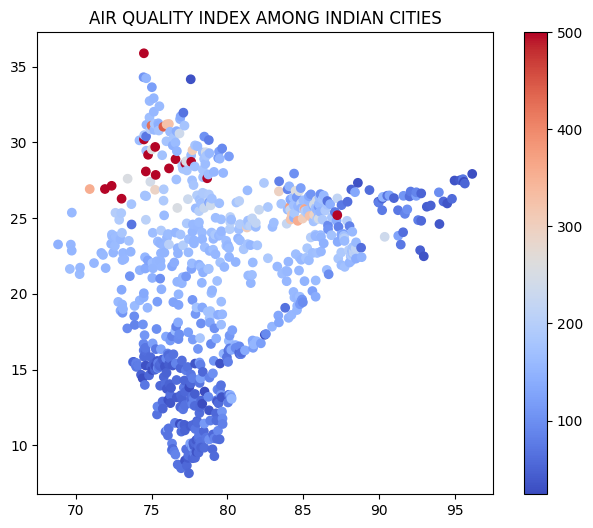

In [56]:
#PLOTTING CHOROPLETH MAP
fig,ax=plt.subplots(figsize=(8,6))
gdf.plot(column='AQI Value',cmap='coolwarm',legend=True,ax=ax)
ax.set_title('AIR QUALITY INDEX AMONG INDIAN CITIES')
plt.show 

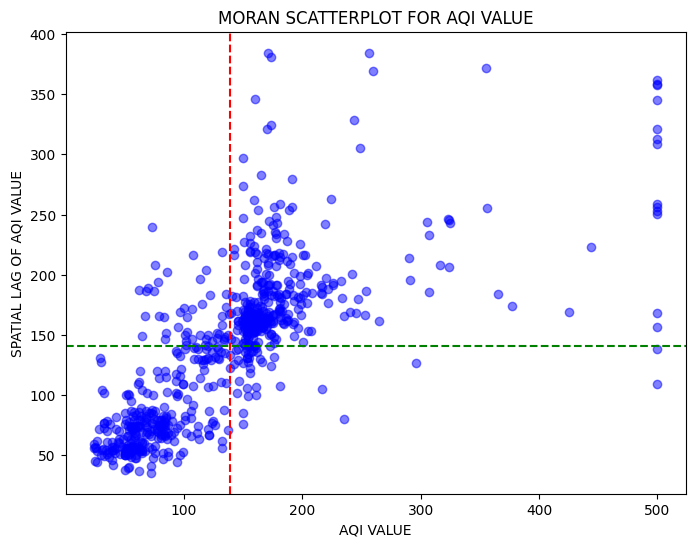

Moran's I: 0.5705608829102755
Z_Score: 25.545400109735606
P_Value: 0.001


In [43]:
##SPARIAL AUTOCORRELATION ANALYSIS
# Create spatial weights matrix (based on k-nearest neighbors)
w = pysal.lib.weights.KNN.from_dataframe(gdf, k=5)

# Calculate Moran's I for AQI Value
moran = esda.Moran(gdf['AQI Value'], w)
lag = pysal.lib.weights.lag_spatial(w,gdf['AQI Value'])
plt.figure(figsize=(8,6))
plt.scatter(gdf['AQI Value'],lag,color='b',alpha=0.5)
plt.axvline(gdf['AQI Value'].mean(),color='r',linestyle='--')
plt.axhline(lag.mean(),color='g',linestyle='--')
plt.title('MORAN SCATTERPLOT FOR AQI VALUE')
plt.xlabel('AQI VALUE')
plt.ylabel('SPATIAL LAG OF AQI VALUE')
plt.show()

# Print Moran's I,Z and p values
p_value = moran.p_sim
z_score = moran.z_sim
print(f"Moran's I: {moran.I}")
print("Z_Score:", z_score)
print("P_Value:", p_value)

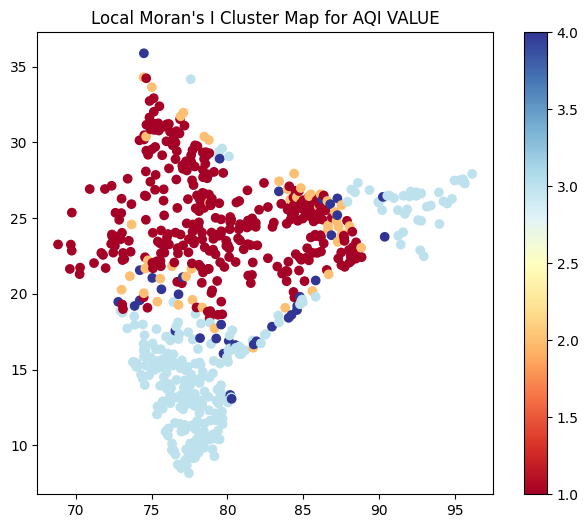

In [58]:
##HOTSPOT ANALYSIS
# Calculate Local Moran's I for AQI Value
lisa = esda.Moran_Local(gdf['AQI Value'], w)

# Plot LISA cluster map
gdf['LISA_cluster'] = lisa.q
fig, ax = plt.subplots(figsize=(8, 6))
gdf.plot(column='LISA_cluster', cmap='RdYlBu', legend=True, ax=ax)
ax.set_title('Local Moran\'s I Cluster Map for AQI VALUE')
plt.show()

In [45]:
import numpy as np
import pysal.lib
import libpysal
from libpysal import weights
from spreg import OLS, ML_Lag

In [52]:
# Construct dependent and independent variables
y = India[['AQI Value']].values
X = India[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value','PM2.5 AQI Value']].values


In [53]:
# Fit Spatial Autoregressive Model (SAR)
model_sar = ML_Lag(y, X, w, name_y='AQI Values', name_x=['CO AQI', 'Ozone AQI', 'NO2 AQI','PM2.5 AQI Value'])
print(model_sar.summary)
print("Lambda(Spatial Error) Coefficients(SAR):",model_sar.rho) 

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  AQI Values                Number of Observations:         707
Mean dependent var  :    139.2376                Number of Variables   :           6
S.D. dependent var  :     81.9493                Degrees of Freedom    :         701
Pseudo R-squared    :      0.9848
Spatial Pseudo R-squared:  0.9849
Log likelihood      :  -2636.8358
Sigma-square ML     :    101.6302                Akaike info criterion :    5285.672
S.E of regression   :     10.0812                Schwarz criterion     :    5313.038

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [33]:
# Fit Spatial Error Model (SEM)
model_sem = OLS(y, X, w, name_y='AQI Value', name_x=['CO AQI', 'Ozone AQI', 'NO2 AQI','PM2.5 AQI Value'],name_w='KNN',spat_diag=True,moran=True)
print(model_sem.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :         KNN
Dependent Variable  :   AQI Value                Number of Observations:         707
Mean dependent var  :    139.2376                Number of Variables   :           5
S.D. dependent var  :     81.9493                Degrees of Freedom    :         702
R-squared           :      0.9848
Adjusted R-squared  :      0.9847
Sum squared residual:     71906.7                F-statistic           :  11396.3552
Sigma-square        :     102.431                Prob(F-statistic)     :           0
S.E. of regression  :      10.121                Log likelihood        :   -2637.100
Sigma-square ML     :     101.707                Akaike info criterion :    5284.199
S.E of regression ML:     10.0850                Schwarz criterion     :    5307.004

------------------------------------------------------------